## Extracting Dataset using Kaggle API

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## Importing the Dog vs Cat Dataset from Kaggle

In [3]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 97% 787M/812M [00:05<00:00, 58.3MB/s]
100% 812M/812M [00:05<00:00, 165MB/s] 


In [4]:
!ls

Dog_Breeds.jpg	dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
# Extracting the compresed dataset
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
# Extracting the compresed dataset
from zipfile import ZipFile
dataset = '/content/train.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
# Counting the number of files in train folder
import os
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images:', file_count)

Number of images: 25000


## Printing the name of image

In [8]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.12354.jpg', 'cat.5914.jpg', 'cat.7639.jpg', 'cat.5137.jpg', 'dog.4171.jpg', 'cat.5937.jpg', 'cat.11902.jpg', 'dog.3008.jpg', 'dog.6034.jpg', 'cat.10750.jpg', 'dog.11979.jpg', 'dog.5882.jpg', 'dog.5719.jpg', 'dog.4482.jpg', 'cat.5481.jpg', 'cat.11712.jpg', 'dog.9503.jpg', 'cat.4839.jpg', 'dog.6637.jpg', 'cat.840.jpg', 'cat.11540.jpg', 'dog.4982.jpg', 'cat.2099.jpg', 'cat.11325.jpg', 'dog.72.jpg', 'dog.1665.jpg', 'cat.7432.jpg', 'dog.11700.jpg', 'dog.1058.jpg', 'cat.2978.jpg', 'dog.89.jpg', 'cat.11382.jpg', 'cat.6827.jpg', 'dog.10190.jpg', 'dog.7479.jpg', 'cat.10144.jpg', 'dog.1683.jpg', 'cat.10464.jpg', 'dog.4740.jpg', 'dog.5709.jpg', 'dog.9447.jpg', 'dog.10065.jpg', 'dog.9205.jpg', 'dog.6899.jpg', 'cat.7649.jpg', 'dog.6330.jpg', 'cat.897.jpg', 'dog.7972.jpg', 'cat.4352.jpg', 'cat.6157.jpg', 'cat.9884.jpg', 'cat.5032.jpg', 'dog.11326.jpg', 'dog.3243.jpg', 'cat.2031.jpg', 'dog.11313.jpg', 'cat.3981.jpg', 'cat.11190.jpg', 'dog.5720.jpg', 'dog.11257.jpg', 'dog.8777.jpg', 'dog.1935.jp

## Importing the Dependencies

In [9]:
import numpy as  np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
# import cv2 # for normal use expect google colab

## Displaying the image of dogs and cats

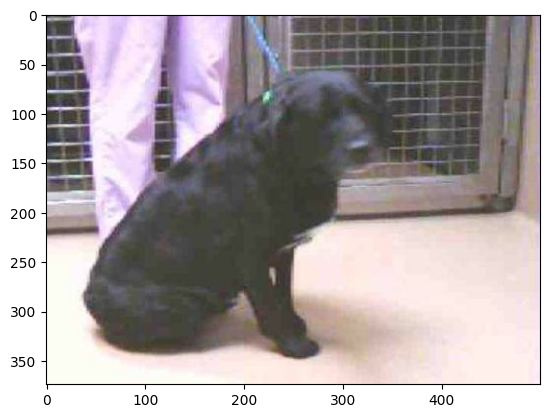

In [10]:
# display the first dog image
file_names = os.listdir('/content/train')
for img_file in file_names:
  if img_file.startswith('dog'):
    img_path = '/content/train/' + img_file
    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.show()
    break

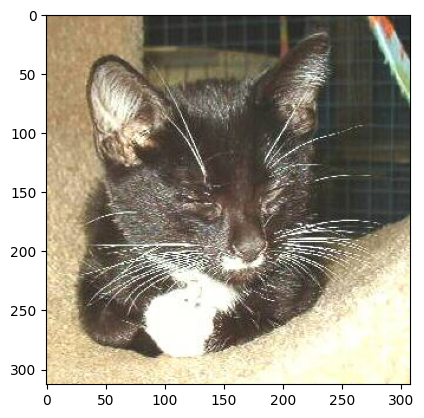

In [11]:
# display the first cat image
file_names = os.listdir('/content/train')
for img_file in file_names:
  if img_file.startswith('cat'):
    img_path = '/content/train/' + img_file
    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.show()
    break

## Resizing all the images

In [12]:
# Counting the dog and cat image amount
file_names = os.listdir('/content/train')
dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count+=1
  else:
    cat_count+=1

print('Number of dogs:', dog_count)
print('Number of cats:', cat_count)

Number of dogs: 12500
Number of cats: 12500


In [13]:
# Creating a directory for resized image
os.makedirs('/content/resized_images', exist_ok=True)
origin_folder = '/content/train'
resized_folder = '/content/resized_images'

dog_count = 0
cat_count = 0
target_count = 1000

for filename in os.listdir(origin_folder):
  if dog_count < target_count and filename.startswith('dog'):
    img_path = origin_folder + '/' + filename
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    newImgPath = resized_folder + '/' + filename
    img.save(newImgPath)
    dog_count += 1

  elif cat_count < target_count and filename.startswith('cat'):
    img_path = origin_folder + '/' + filename
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    newImgPath = resized_folder + '/' + filename
    img.save(newImgPath)
    cat_count += 1

  if dog_count == target_count and cat_count == target_count:
    break

print(f"Resized {dog_count} dog images and {cat_count} cat images.")

Resized 1000 dog images and 1000 cat images.


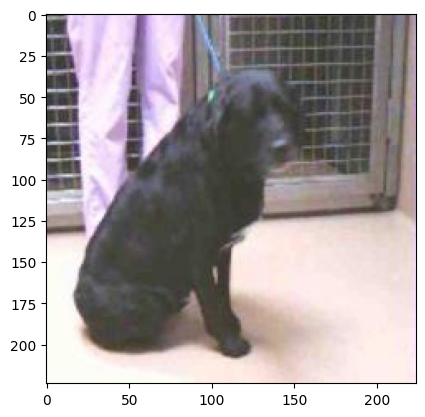

In [14]:
# display the first dog image
file_names = os.listdir('/content/train')
for img_file in file_names:
  if img_file.startswith('dog'):
    img_path = '/content/resized_images/' + img_file
    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.show()
    break

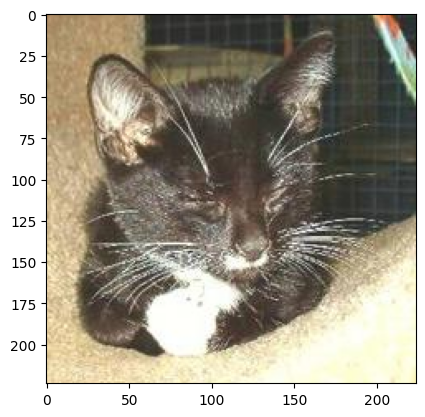

In [15]:
# display the first cat image
file_names = os.listdir('/content/train')
for img_file in file_names:
  if img_file.startswith('cat'):
    img_path = '/content/resized_images/' + img_file
    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.show()
    break

## Creating Labels for reiszed images of dogs and cat
Cat --> 0
Dog --> 1

In [16]:
filenames = os.listdir('/content/resized_images')
labels = []

for i in range(2000): # Totally 2000 images

  file_name = filenames[i]
  lable = file_name[0:3]

  if lable == 'dog':
    labels.append(1)
  else:
    labels.append(0)


In [17]:
print(filenames[0:5])
print(labels[0:5])

['cat.12354.jpg', 'cat.5914.jpg', 'cat.7639.jpg', 'cat.5137.jpg', 'dog.4171.jpg']
[0, 0, 0, 0, 1]


In [18]:
# Counting the dog and cat image number out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1000 1000]


## Converting all the resized images to numpy arrays

In [19]:
import cv2
import glob

In [20]:
image_directory = '/content/resized_images/'
image_extension = ['png','jpg']
files = [] # Adding all the files ends with png/jpg format into the "file" list

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])


In [21]:
print(dog_cat_images)

[[[[ 94 131 165]
   [ 93 130 164]
   [ 96 133 167]
   ...
   [ 57  68  48]
   [ 59  63  58]
   [ 61  60  62]]

  [[ 91 128 162]
   [ 96 133 167]
   [101 138 172]
   ...
   [ 54  65  45]
   [ 58  59  55]
   [ 58  57  59]]

  [[ 88 125 159]
   [101 138 172]
   [108 145 179]
   ...
   [ 46  56  39]
   [ 49  51  45]
   [ 51  49  49]]

  ...

  [[173 218 239]
   [182 227 248]
   [178 223 244]
   ...
   [202 250 254]
   [192 247 252]
   [189 245 250]]

  [[166 210 233]
   [178 222 245]
   [175 219 242]
   ...
   [201 249 253]
   [192 247 252]
   [186 244 250]]

  [[166 210 233]
   [183 227 250]
   [185 229 252]
   ...
   [199 250 253]
   [191 245 252]
   [186 244 250]]]


 [[[ 12  65 122]
   [ 20  73 130]
   [ 16  70 130]
   ...
   [ 52  64  70]
   [ 57  69  75]
   [ 64  76  82]]

  [[ 15  68 125]
   [ 21  74 131]
   [ 17  71 131]
   ...
   [ 49  61  67]
   [ 47  59  65]
   [ 47  59  65]]

  [[ 19  72 129]
   [ 23  76 133]
   [ 19  73 133]
   ...
   [ 60  72  78]
   [ 57  69  75]
   [ 58  70

In [22]:
print(type(dog_cat_images))
print(dog_cat_images.shape) # 2000 images, 224*224 size, 3 channels

<class 'numpy.ndarray'>
(2000, 224, 224, 3)


In [23]:
X = dog_cat_images
Y = np.asarray(labels)

## Train Test Split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [26]:
# Scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255
print(X_train_scaled)

[[[[0.25490196 0.45098039 0.29411765]
   [0.24705882 0.43137255 0.27843137]
   [0.25882353 0.43529412 0.28235294]
   ...
   [0.16470588 0.38039216 0.25098039]
   [0.16470588 0.37647059 0.25882353]
   [0.08235294 0.30588235 0.18431373]]

  [[0.28235294 0.46666667 0.31372549]
   [0.23529412 0.41960784 0.26666667]
   [0.21568627 0.39215686 0.23921569]
   ...
   [0.12941176 0.3372549  0.20784314]
   [0.10588235 0.32156863 0.19215686]
   [0.03529412 0.25882353 0.12941176]]

  [[0.30980392 0.48627451 0.33333333]
   [0.23921569 0.41568627 0.2627451 ]
   [0.17647059 0.35294118 0.2       ]
   ...
   [0.12156863 0.32156863 0.18823529]
   [0.09411765 0.30588235 0.16862745]
   [0.03921569 0.25882353 0.12156863]]

  ...

  [[0.64705882 0.65098039 0.61176471]
   [0.6627451  0.67058824 0.62352941]
   [0.6745098  0.68235294 0.63529412]
   ...
   [0.36470588 0.40784314 0.36862745]
   [0.38823529 0.43137255 0.39215686]
   [0.40392157 0.45098039 0.40392157]]

  [[0.6627451  0.6627451  0.61568627]
   [0.6

## Building neural network

In [27]:
import tf_keras
import tensorflow_hub as hub

In [28]:
mobilenet_model = 'https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)

In [29]:
num_of_classes = 2

model = tf_keras.Sequential([

    pretrained_model,
    tf_keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4226432   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 4228994 (16.13 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 4226432 (16.12 MB)
_________________________________________________________________


In [30]:
model.compile(
    optimizer='adam',
    loss=tf_keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [31]:
history = model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 62s 1s/step - loss: 0.2050 - acc: 0.9162
Epoch 2/5
50/50 [==============================] - 52s 1s/step - loss: 0.0784 - acc: 0.9731
Epoch 3/5
50/50 [==============================] - 50s 1s/step - loss: 0.0604 - acc: 0.9812
Epoch 4/5
50/50 [==============================] - 53s 1s/step - loss: 0.0475 - acc: 0.9837
Epoch 5/5
50/50 [==============================] - 63s 1s/step - loss: 0.0386 - acc: 0.9906


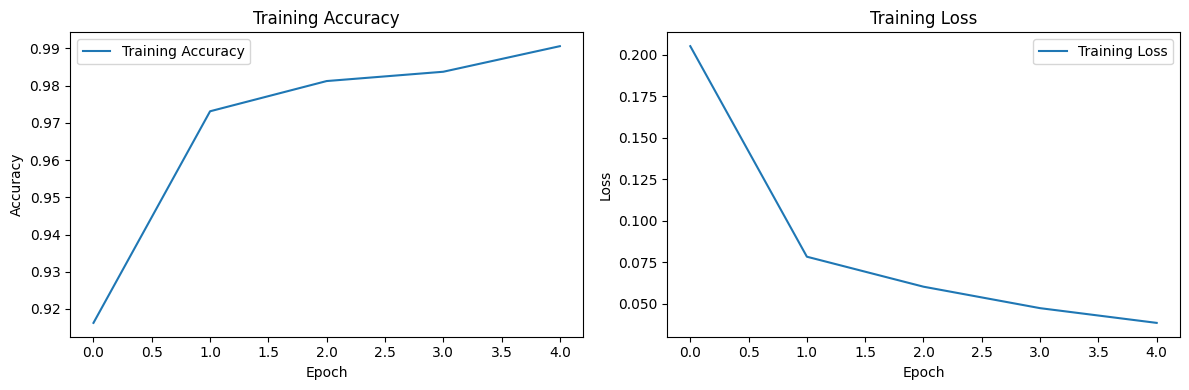

In [32]:

# Plot training accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test loss:', score)
print('Test accuracy:', acc)

13/13 [==============================] - 14s 961ms/step - loss: 0.0625 - acc: 0.9825
Test loss: 0.06254494190216064
Test accuracy: 0.9825000166893005


## Predictive System

Path of the image to predict/content/Dog_Breeds.jpg


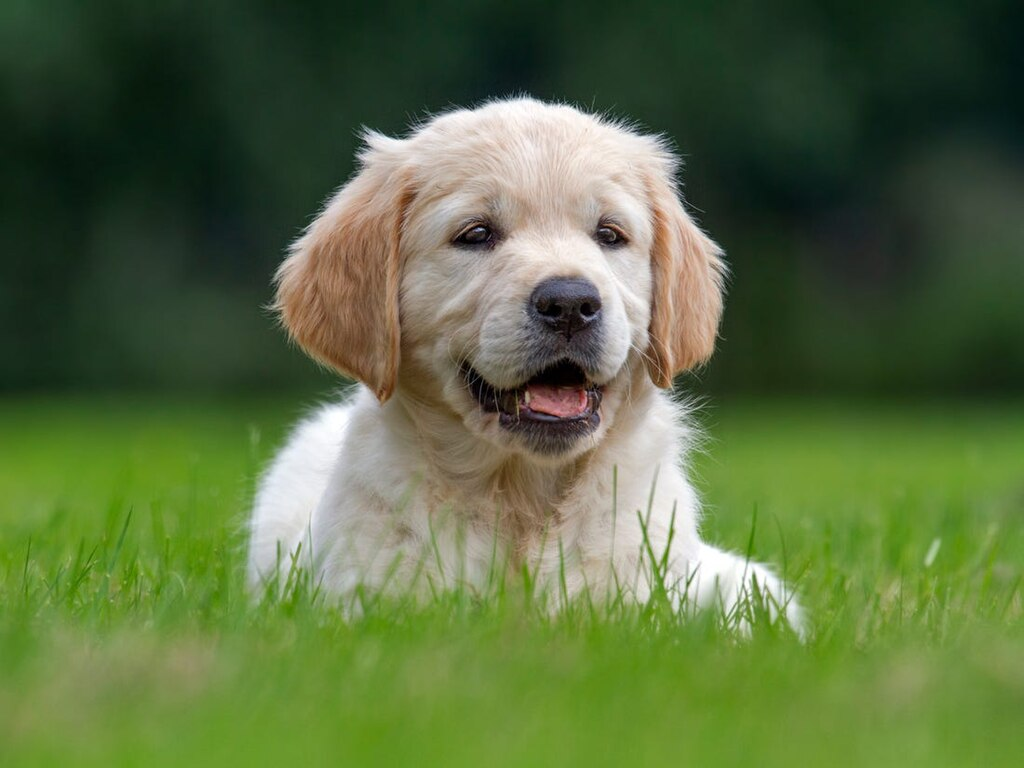

1/1 [==============================] - 1s 1s/step
The image is a dog


In [34]:
input_image_path = input('Path of the image to predict')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224, 224))
input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image is a cat')
else:
  print('The image is a dog')